<div style="background-color:orange; color:black; padding:10px; border-radius:8px; text-align:center; font-size:24px; font-weight:bold;">
Pizza Sales Analytics
</div>  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
order_details = pd.read_csv('order_details.csv')
orders = pd.read_csv('orders.csv')
data_dictionary = pd.read_csv('data_dictionary.csv')
pizza_types = pd.read_csv('pizza_types.csv', encoding='latin1')
pizzas = pd.read_csv('pizzas.csv')

In [3]:
df = pd.merge(order_details, orders, on='order_id')
df = pd.merge(df, pizzas, on='pizza_id')
df = pd.merge(df, pizza_types, on='pizza_type_id', how='left')

<div style="background-color:orange; color:black; padding:10px; border-radius:8px; text-align:center; font-size:24px; font-weight:bold;">
📊 Exploratory Data Analysis (EDA)
</div>

In [4]:
df

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,01/01/2015,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,01/01/2015,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,01/01/2015,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,01/01/2015,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,01/01/2015,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31/12/2015,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,31/12/2015,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,31/12/2015,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,31/12/2015,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [6]:
df.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [7]:
df.describe()

,order_details_id,order_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132
std,14035.529381,6180.119770,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


In [55]:
df.duplicated().sum()

0

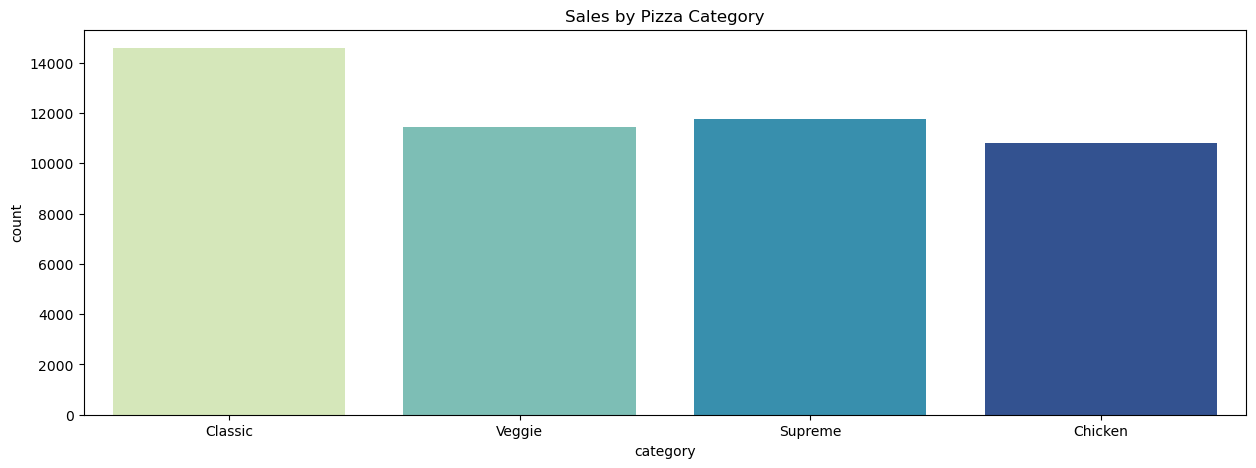

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="category", palette="YlGnBu")
plt.title("Sales by Pizza Category")
plt.show()


In [44]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

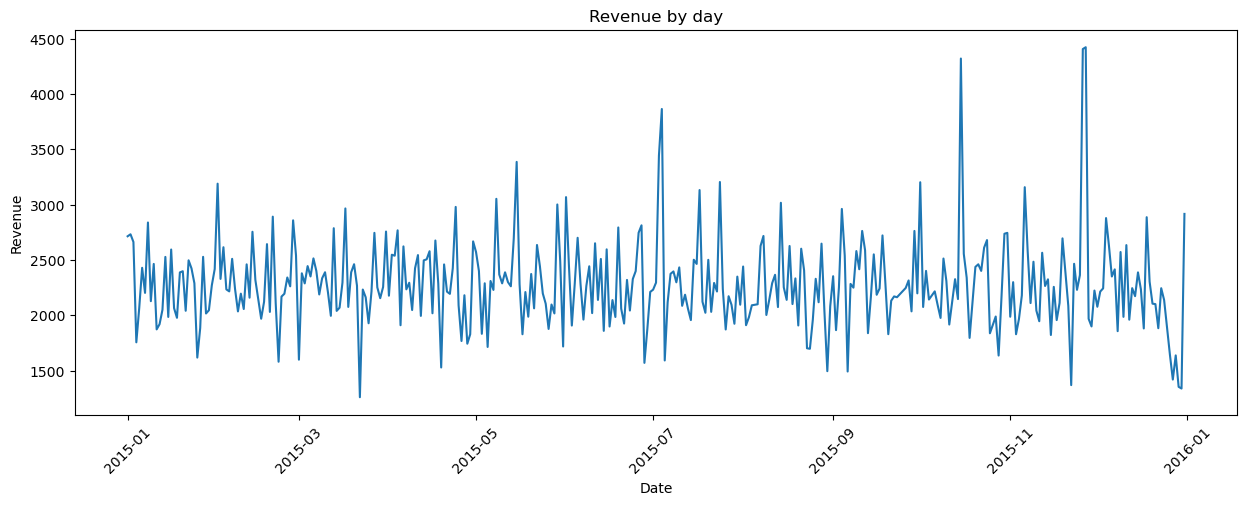

In [45]:
plt.figure(figsize=(15,5))
df['total'] = df['price'] * df['quantity']
revenue_by_day = df.groupby('date')['total'].sum()

plt.plot(revenue_by_day)
plt.title("Revenue by day")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

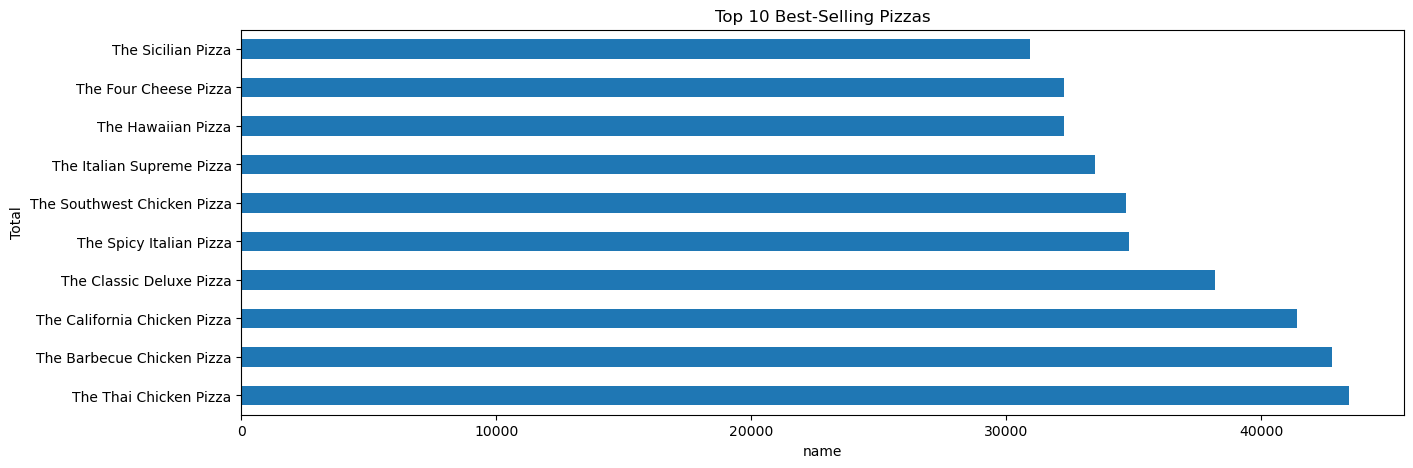

In [53]:
top_pizzas = df.groupby('name')['total'].sum().sort_values(ascending=False).head(10)

top_pizzas.plot(kind='barh', figsize=(15, 5))
plt.title("Top 10 Best-Selling Pizzas")
plt.xlabel("name")
plt.ylabel("Total")
plt.show()

In [59]:
df.groupby('size')['quantity'].sum().sort_values(ascending=False)

size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

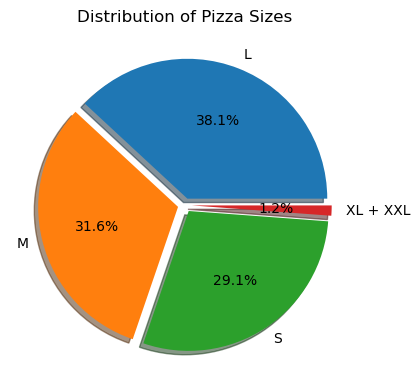

In [64]:
size = df['size'].value_counts()
size["XL + XXL"] = size["XL"] + size["XXL"]
size = size.drop(["XL", "XXL"])
labels = size.index
values = size.values
explode = [0.05] * len(size) 

plt.figure(figsize=(6, 4))
plt.pie(values, labels=labels, autopct='%0.1f%%', explode=explode, shadow=True)
plt.title("Distribution of Pizza Sizes")
plt.tight_layout()
plt.show

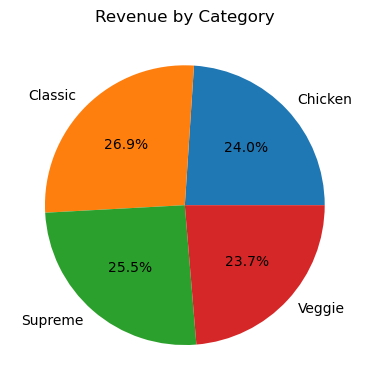

In [69]:
df.groupby('category')['total'].sum().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6, 4),
    title='Revenue by Category'
)
plt.ylabel("")
plt.tight_layout()
plt.show()

In [78]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

In [79]:
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

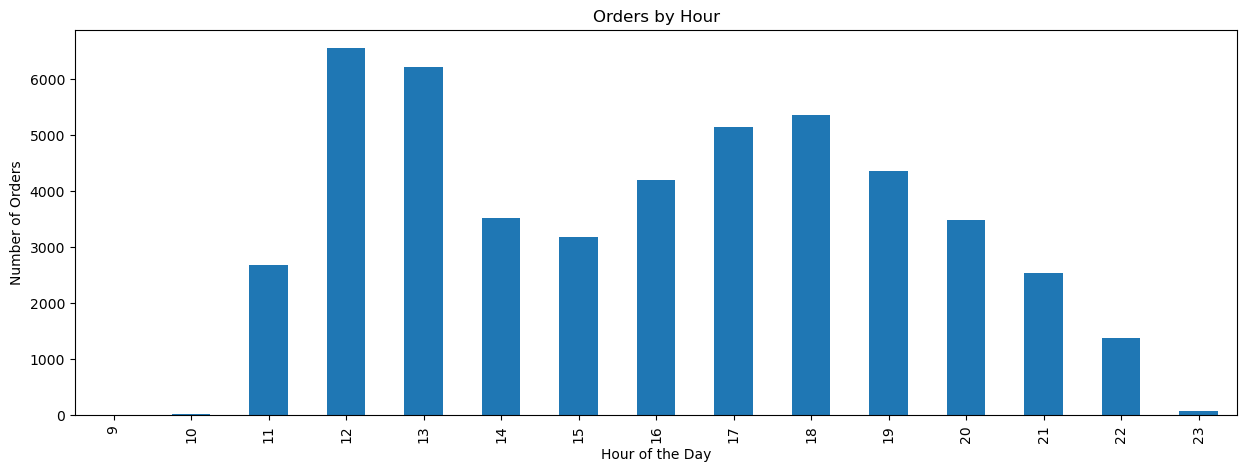

In [81]:
orders_by_hour = df.groupby('hour').size()

orders_by_hour.plot(kind='bar', figsize=(15, 5))
plt.title("Orders by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.show()

## <h3 style="color:orange; text-align:center;">💡 Recommendations</h3>

### 🔸 **Focus production on Large-sized pizzas**, especially The Classic Deluxe  
### 🔸 **Increase staffing and stock levels during peak hours** (12:00–13:00)  
### 🔸 **Launch promotions** for less popular sizes (e.g., Small or XL)  
### 🔸 **Consider bundling Classic category pizzas with drinks** for upselling

In [8]:
df.to_csv("pizza_sales.csv", index=False, encoding='utf-8')
print("✅ Файл 'pizza_sales.csv' успешно сохранён!")

✅ Файл 'pizza_sales.csv' успешно сохранён!
